In [1]:
import numpy as np

In [2]:
x=np.arange(1,4).reshape((1,3))
y=np.repeat(x,[27],axis=0)
np.reshape(y,(9,9))


array([[1, 2, 3, 1, 2, 3, 1, 2, 3],
       [1, 2, 3, 1, 2, 3, 1, 2, 3],
       [1, 2, 3, 1, 2, 3, 1, 2, 3],
       [1, 2, 3, 1, 2, 3, 1, 2, 3],
       [1, 2, 3, 1, 2, 3, 1, 2, 3],
       [1, 2, 3, 1, 2, 3, 1, 2, 3],
       [1, 2, 3, 1, 2, 3, 1, 2, 3],
       [1, 2, 3, 1, 2, 3, 1, 2, 3],
       [1, 2, 3, 1, 2, 3, 1, 2, 3]])

## task 1 - done

In [3]:
def minmax_scaling_without_for(a):
    min_ele=np.min(a,axis=1)
    max_ele=np.max(a,axis=1)
    maxmin_diff=max_ele-min_ele
    min_ele_r = np.repeat(min_ele,a.shape[1]).reshape(a.shape)
    max_ele_r = np.repeat(max_ele,a.shape[1]).reshape(a.shape)
    maxmin_ele = np.repeat(maxmin_diff,a.shape[1]).reshape(a.shape)
    scaled=(a-min_ele_r)/maxmin_ele
    return scaled

In [4]:
matrix=np.array([[1.,2.,3.],[10.,15.,20.],[-5.,-11.,9.]])
minmax_scaling_without_for(matrix)


array([[0. , 0.5, 1. ],
       [0. , 0.5, 1. ],
       [0.3, 0. , 1. ]])

In [5]:
def scaling(mat):
    matrix1 =np.copy(mat,order='K')
    a=0
    for row in matrix1:
        max_e=max(row)
        min_e=min(row)
        maxmin_d=max_e-min_e
        b=0
        for i in row:
            matrix1[a,b]=(matrix1[a,b]-min_e)/maxmin_d
            b=b+1
        a=a+1
    return matrix1       

In [6]:
scaling(matrix)

array([[0. , 0.5, 1. ],
       [0. , 0.5, 1. ],
       [0.3, 0. , 1. ]])

## task 2 - done

In [7]:
matrix3=np.array([[4.5,-5,83],[5.11,5.25,2.],[-5,42,69.99]])
matrix3_1=np.array([[5,5,5],[5.,5.25,2.],[-5,42,69.99]])


In [8]:
def closest_wf(another):
    val=input("enter value:")
    val_arr=np.full(another.shape,float(val))
    diff=another-val_arr
    diff_abs=np.abs(diff)
    mini=np.min(diff_abs)
    result=np.where(diff_abs==mini)
    index=tuple(zip(result[0],result[1]))
    try:
        index[1]
    except:
        index=index[0]
    return(index)

In [9]:
closest_wf(matrix3)

enter value:5


(1, 0)

In [10]:
def closest_f(matr):
    while True:
        valu=input("enter number:")
        try:
            v=int(valu)
            break
        except:
            continue
    f =np.copy(matr,order='K')
    a=0
    for row in f:
        b=0
        for i in row:
            f[a,b]=f[a,b]-v
            b=b+1
        a=a+1
    list_temp=[]
    for row in f:
        list_temp.append(min(abs(row)))
    result=np.where(np.abs(f)==min(list_temp))
    index=tuple(zip(result[0],result[1]))
    try:
        index[1]
    except:
        index=index[0]
    return(index)   

In [11]:
closest_f(matrix3)

enter number:5


(1, 0)

## task 3 - done

[]


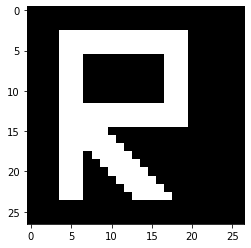

In [92]:
zeroarr=np.zeros((27,27))
zeroarr[3:24,4:7]=255
zeroarr[3:6,4:20]=255
zeroarr[12:15,4:20]=255
zeroarr[3:15,17:20]=255
c=0
a2=0
for row in zeroarr:
    
    for i in range(len(row)):
        if(i>=4 and a2<24):
            if (a2 - i in [10,9,8,7,9,6] ):
                zeroarr[a2,i]=255

    a2=a2+1


        
import matplotlib.pyplot as plt
plt.imshow(zeroarr, cmap="gray")
print(plt.plot())
#print(plt.show(block=False))

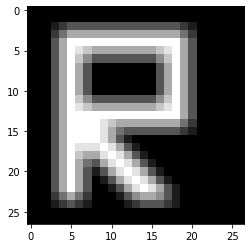

None


In [13]:
smat=np.copy(zeroarr,order='K')
def sliding_matrix(matrix,index):
    sliding_mat=matrix[index[0]-1:index[0]+2,index[1]-1:index[1]+2]
    return(sliding_mat)
sliding_matrix(zeroarr,(1,2))
x=1
while (x<smat.shape[0]):
    y=1
    while(y<smat.shape[1]):
        smat[x,y]=np.mean(sliding_matrix(zeroarr,(x,y)))
        y=y+1
    x=x+1
plt.imshow(smat, cmap="gray")
print(plt.show())

## task 4 - done

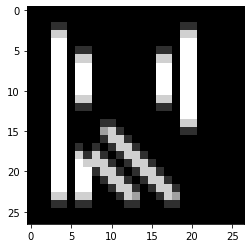

None


In [14]:
semat=np.copy(zeroarr,order='K')
wt_h=np.array([[-3.,-10.,-3.],[0.,0.,0.],[3.,10.,3.]])
wt_v=np.array([[-3.,0.,3.],[-10.,0.,10.],[-3.,0.,3.]])

x=1
while (x<semat.shape[0]-1):
    y=1
    while(y<semat.shape[1]-1):
        sm1=np.copy(sliding_matrix(zeroarr,(x,y)),order='K')
        sm2=np.copy(sliding_matrix(zeroarr,(x,y)),order='K')
        for s in range(3):
            for d in range(3):
                sm1[s,d]=(sliding_matrix(zeroarr,(x,y))[s,d])*wt_v[s,d]
                sm2[s,d]=(sliding_matrix(zeroarr,(x,y))[s,d])*wt_v[s,d]
        gx=np.mean(sm1)
        gy=np.mean(sm2)
        semat[x,y]=abs(gx)+abs(gy)
        y=y+1
    x=x+1
plt.imshow(semat, cmap="gray")
print(plt.show())

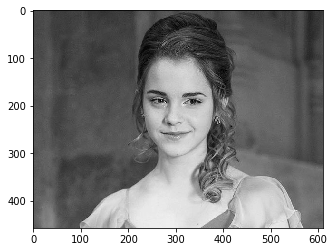

None


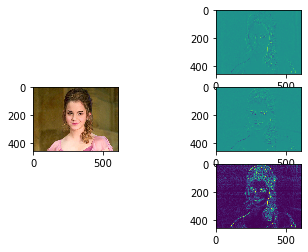

In [81]:
%matplotlib inline
# Note: DO NOT USE THE SCIPY INBUILT FUNCTION. CONVOLVE USING FILTERS AND NORMALIZE
import scipy
import imageio
import matplotlib.pyplot as plt
import numpy as np
import random

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

im = imageio.imread('./fig02.jpg').astype("int32")
grey_img_t = rgb2gray(im) #convert image to greyscale 

plt.imshow(grey_img_t, cmap="gray")
print(plt.show())

grey_shape = list(im.shape)
grey_shape[-1] = 1
grey_img = np.reshape(grey_img_t,grey_shape) 
grey_shape = tuple(grey_shape)

assert grey_img.shape == grey_shape

ax1 = plt.subplot(323)
ax2 = plt.subplot(322)
ax3 = plt.subplot(324)
ax4 = plt.subplot(326)

## Initializing the sobel filter
filterx = np.array([[3, 0 ,-3],
                      [10 , 0 , -10],
                      [3, 0 ,-3]])
filtery = filterx.T

## Fill the code below
 
dx =np.copy(grey_img_t,order='K')
dy = np.copy(grey_img_t,order='K')
for i in range(1,grey_img_t.shape[0]-2):
    for j in range(1,grey_img_t.shape[1]-2):
        dx[i][j]=np.sum(filterx*grey_img_t[i-1:i+2,j-1:j+2])
        dy[i][j]=np.sum(filtery*grey_img_t[i-1:i+2,j-1:j+2])
mag =  np.sqrt(np.multiply(dx,dx)+ np.multiply(dy,dy))
normalized =minmax_scaling_without_for(mag)

## End
## Plot it
ax1.imshow(im)
ax2.imshow(dx)
ax3.imshow(dy)
ax4.imshow(normalized)
plt.show()


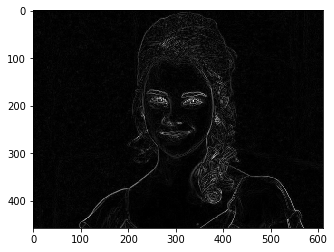

None


In [91]:
##alternate approach - takes bit more time

tempmat=np.copy(grey_img_t,order='K')
x=1
while (x<tempmat.shape[0]-1):
    y=1
    while(y<tempmat.shape[1]-1):
        sm1=np.copy(sliding_matrix(grey_img_t,(x,y)),order='K')
        sm2=np.copy(sliding_matrix(grey_img_t,(x,y)),order='K')
        for s in range(3):
            for d in range(3):
                sm1[s,d]=(sliding_matrix(grey_img_t,(x,y))[s,d])*filterx[s,d]
                sm2[s,d]=(sliding_matrix(grey_img_t,(x,y))[s,d])*filtery[s,d]
        gx=np.mean(sm1)
        gy=np.mean(sm2)
        tempmat[x,y]=abs(gx)+abs(gy)
        y=y+1
    x=x+1
plt.imshow(tempmat, cmap="gray")
print(plt.show())


## task 6 - done

In [88]:
def conway_gol(image):
    grey_img_tc=np.copy(image,order='K')
    for i in range(grey_img_tc.shape[0]):
        for j in range(grey_img_tc.shape[1]):
            if (grey_img_tc[i,j]<(np.mean(grey_img_tc))):
                grey_img_tc[i,j]=0
            if (grey_img_tc[i,j]>=(np.mean(grey_img_tc))):
                grey_img_tc[i,j]=255

    gol=np.copy(grey_img_tc,order='K')
    gol1=np.copy(grey_img_tc,order='K')
    while True:
        try:
            for row in range(1,gol.shape[0]):
                for o in range(1,gol.shape[1]):
                        su=np.sum(sliding_matrix((gol),(row,o)))/255
                        if (gol[row,o]==0 and su==3):
                            gol1[row,o]=255
                        elif (su<2 or su>3):
                            gol1[row,o]=0
                #what's life without a little randomness - not included in conway's game of life
                #comment following random lines to get official conway's game of life
                gol[random.randrange(0,gol.shape[0]),random.randrange(0,gol.shape[1])]=255
                gol[random.randrange(0,gol.shape[0]),random.randrange(0,gol.shape[1])]=255
            gol=np.copy(gol1,order='K')
            plt.imshow(gol, cmap="gray")
            display.display(plt.gcf())
            display.clear_output(wait=True)
            time.sleep(0.001)
            plt.clf()
        except KeyboardInterrupt:
            break
    #after exectuting this block -click "interuppt the kernel" button to see magic - it actually moves!!!        

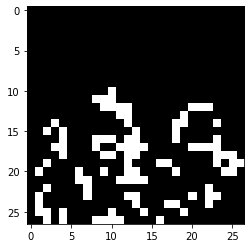

In [89]:
conway_gol(zeroarr)

In [90]:
im3 = imageio.imread('tin.jpg').astype("int32")
grey_img_t3 = rgb2gray(im3) #convert image to greyscale 
conway_gol(grey_img_t3)

<Figure size 432x288 with 0 Axes>

### applying this game of life over images is so much fun

In [79]:
import imageio

im2 = imageio.imread('imageio:chelsea.png')
plt.imshow(im2, cmap="gray")
print(plt.show())
grey_img_t4 = rgb2gray(im2) #convert image to greyscale 
conway_gol(grey_img_t4)

<Figure size 432x288 with 0 Axes>